In [14]:
import numpy as np
from scipy.stats import multivariate_normal


def expectation_step(X, mu, sigma, pi, k):
    n, d = X.shape
    likeli = np.zeros((n, k))
    gamma = np.zeros((n, k))

    for j in range(k):
        likeli[:, j] = multivariate_normal.pdf(X, mean=mu[j], cov=sigma[j])

    for j in range(k):
        gamma[:, j] = pi[j] * likeli[:, j]

    gamma /= np.sum(gamma, axis=1, keepdims=True)

    return gamma


def maximization_step(X, gamma, k):
    n, d = X.shape
    mu = np.zeros((k, d))
    sigma = np.zeros((k, d, d))
    pi = np.zeros(k)

    for j in range(k):
        Nj = np.sum(gamma[:, j])
        mu[j] = np.sum(X * gamma[:, j][:, np.newaxis], axis=0) / Nj
        sigma[j] = ((X - mu[j]) * gamma[:, j][:, np.newaxis]).T @ (X - mu[j]) / Nj
        pi[j] = Nj / n

    return mu, sigma, pi


def EM(X, k, iter=300):
    n, d = X.shape
    mu = np.random.rand(k, d) * np.std(X, axis=0) + np.mean(X, axis=0)
    sigma = np.tile(np.diag(np.var(X, axis=0)), (k, 1, 1))
    pi = np.ones(k) / k

    for i in range(iter):
        prev_means = mu.copy()

        gamma = expectation_step(X, mu, sigma, pi, k)
        mu, sigma, pi = maximization_step(X, gamma, k)


    return gamma, mu, sigma, pi


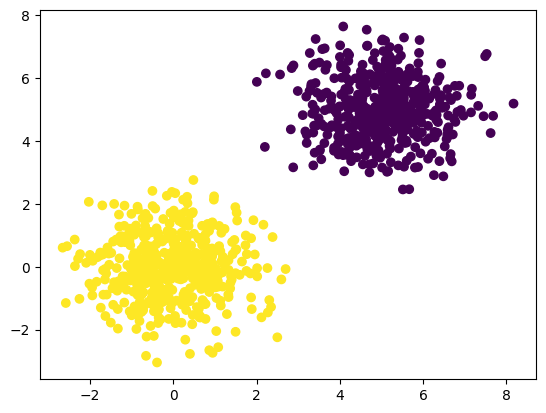

In [25]:
# Generate some random data
np.random.seed(0)
N = 1000
X = np.concatenate([np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=N//2),
                    np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0], [0, 1]], size=N//2)])

# Run EM to cluster the data
K = 2
gamma, mu, cov,pi = EM(X, K)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(expectation_step(X, mu, cov,pi,K), axis=1))
plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data

# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


In [22]:
#from sklearn.mixture import GaussianMixture

# Fit a GMM with k = 2, 3, 4
for i in [2, 3]:
    #gmm = GaussianMixture(n_components=k, random_state=0)
    #gmm.fit(X_reduced)
    gamma,mu,sigma,pi = EM(X_reduced,i)
    print("\n\n\n\n")
    print(f"GMM with k={i}")
    for j in range(i):
        '''print(f"Component {j+1}:")
        print(f"  Mean = {gmm.means_[j]}")
        print(f"  Std Dev = {np.sqrt(gmm.covariances_[j])}")
        print(f"  Mixing Coefficient = {gmm.weights_[j]}")'''
        print(f"\nComponent {j+1}:")
        print(f"\nMean = {mu}")
        print(f"\nStd Dev = {sigma}")
        print(f"\nMixing Coefficient = {pi}")







GMM with k=2

Component 1:

Mean = [[-2.94396178e+02  7.47432860e-01]
 [ 1.52992623e+03 -3.88427983e+00]]

Std Dev = [[[ 2.85809696e+05 -2.95210045e+02]
  [-2.95210045e+02  1.44308449e+02]]

 [[ 3.67057122e+06  8.62033448e+03]
  [ 8.62033448e+03  1.32492407e+02]]]

Mixing Coefficient = [0.83862711 0.16137289]

Component 2:

Mean = [[-2.94396178e+02  7.47432860e-01]
 [ 1.52992623e+03 -3.88427983e+00]]

Std Dev = [[[ 2.85809696e+05 -2.95210045e+02]
  [-2.95210045e+02  1.44308449e+02]]

 [[ 3.67057122e+06  8.62033448e+03]
  [ 8.62033448e+03  1.32492407e+02]]]

Mixing Coefficient = [0.83862711 0.16137289]





GMM with k=3

Component 1:

Mean = [[ 3.28918684e+03 -1.40613740e+00]
 [-4.30961271e+02  3.15374280e+00]
 [ 4.56510841e+02 -6.21916864e+00]]

Std Dev = [[[7.45676354e+06 1.77441825e+04]
  [1.77441825e+04 1.97002835e+02]]

 [[1.83561146e+05 2.26083857e+02]
  [2.26083857e+02 1.32340391e+02]]

 [[7.68197088e+05 3.47145209e+03]
  [3.47145209e+03 1.05932984e+02]]]

Mixing Coefficient

In [17]:
from sklearn.metrics import silhouette_score

sScore = []
for k in range(2, 5):
    gamma, a, b, c = EM(X_reduced, k)
    cLabel = gamma.argmax(axis=1)
    s = silhouette_score(X_reduced, cLabel)
    sScore.append(s)
    print("k=",k,": Silhouette Score = ",s)


k= 2 : Silhouette Score =  0.7044753859164729
k= 3 : Silhouette Score =  0.502413419863506
k= 4 : Silhouette Score =  0.1531783407967825


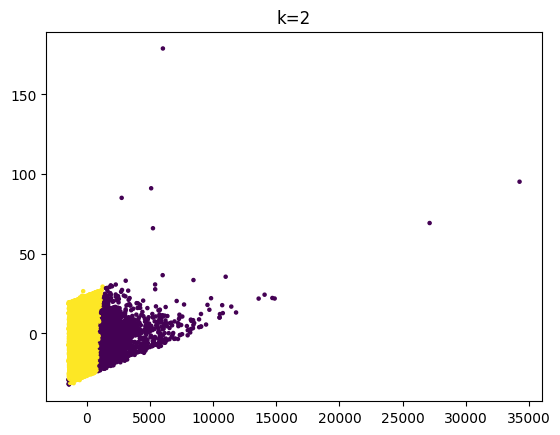

In [18]:
import matplotlib.pyplot as plt
gamma, a, b, c = EM(X_reduced, 2)
cLabel = gamma.argmax(axis=1)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cLabel, s=5, cmap='viridis')
plt.title(f"k={2}")
plt.show()

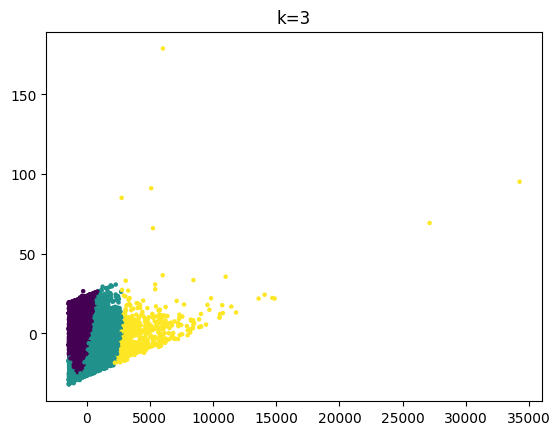

In [19]:
gamma, a, b, c = EM(X_reduced, 3)
cLabel = gamma.argmax(axis=1)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cLabel, s=5, cmap='viridis')
plt.title(f"k={3}")
plt.show()

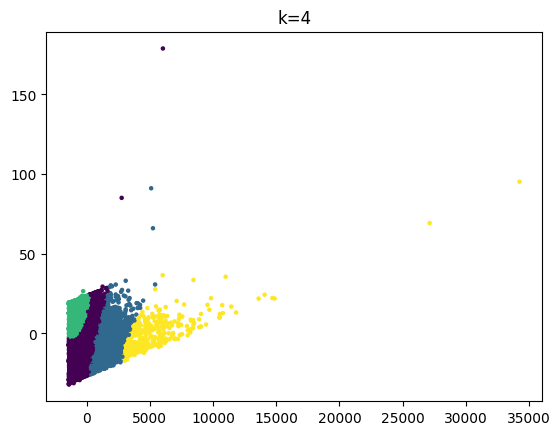

In [20]:
gamma, a, b, c = EM(X_reduced, 4)
cLabel = gamma.argmax(axis=1)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cLabel, s=5, cmap='viridis')
plt.title(f"k={4}")
plt.show()

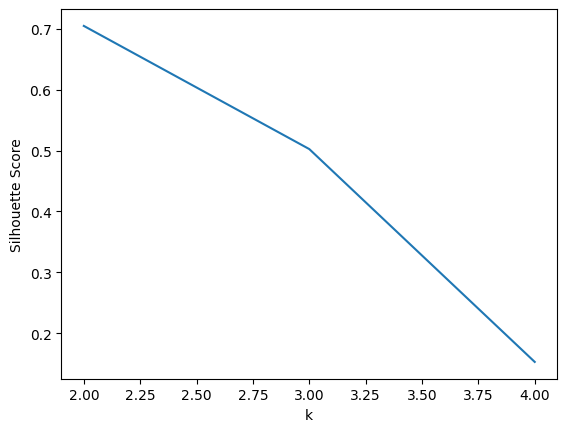

In [21]:
plt.plot([2,3,4], sScore)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

for k = 2 the silhoutte score is greatest so it is it best when k = 2